## Tasca M5 T02

### Descripció
Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

### Exercici 1
Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

In [1]:
import numpy as np
import pandas as pd

fitxer="D:/Users/X/Downloads/housing data.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=',',header=None) #encoding='ISO-8859-1' tambe ok
#utilitzem el nom de les columnes del fitxer descripció per completar el dataframe
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Significat dels atributs:
    
- <B>CRIM</B>     Tasa de criminalitat per ciutat  
- <B>ZN</B>       Proporció de zona residencial per lots de més de 25,000 sq.ft.  
- <B>INDUS</B>    Proporció d'acres comercials no minoristes per ciutat  
- <B>CHAS</B>     Variable ficticia de Charles River (= 1 si el tram limita el riu; 0 en cas contrari)  
- <B>NOX</B>      Concentració d'òxids nítrics (parts per 10 milions)  
- <B>RM</B>       Nombre mitjà d'habitacions per habitatge  
- <B>AGE</B>      Proporció d'unitats ocupades pel propietari construïdes abans de 1940  
- <B>DIS</B>      Distàncies ponderades fins a cinc centres d'ocupació de Boston  
- <B>RAD</B>      índex d'accessibilitat a les carreteres radials  
- <B>TAX</B>      taxa d'impost sobre la propietat de valor total per 10.000 dòlars  
- <B>PTRATIO</B>  Rati alumne-profesossor per ciutat  
- <B>B</B>        1000(Bk - 0.63)^2 on Bk és la propoció de perosnaes de raça negra de la ciutat  
- <B>LSTAT</B>    \% clase baixa de la població  
- <B>MEDV</B>     Valor mig (em milers de \$) de les vivendes ocupades pels seus propietaris  


In [2]:
df.shape # 506 files amb 14 atributs

(506, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#hi ha valors duplicats a les columnes, de fet no n'hi ha cap que tingui valors únics
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Les variables CHAS(limita amb el riu) i RAD són categòriques(index d'accesibilitat a carreteres radials), ZN (proporció de zona residencial) es podria considerar categòrica i la resta són continues.

In [5]:
#no hi ha files duplicades
df[df.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [6]:
##estadística descriptiva del model de dades
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#Veiemn les possibles correlacions entre variables
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Les possibles dependéncies entre variables que mes destaquen:
- RAD(accesibilitat a carreteres radials) i TAX(taxa impostos): 0.91
- DIS(distància centre ocupació) i NOX(òxids nítrics): 0.77
- NOX(òxids nítrics) i INDUS(espai industrial): 0.76
- DIS(distància centre ocupació) i AGE(ocupació propietaris): 0.75

Test de normalitat a les variables  
farem el test de normalitat de Saphiro amb Alfa=5% i també comprovarè visualment amb un gràfic de densitat el comportament de les variables respecte a la normalitat de la seva distribució.

Variable: CRIM
t-statistic=0.450
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: ZN
t-statistic=0.556
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: INDUS
t-statistic=0.900
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: CHAS
t-statistic=0.275
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: NOX
t-statistic=0.936
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: RM
t-statistic=0.961
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: AGE
t-statistic=0.892
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: DIS
t-statistic=0.903
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: RAD
t-statistic=0.680
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: TAX
t-statistic=0.815
p-value=0.000
p<=Alfa -->Probablement la distribució no és normal
Variable: PTRATIO


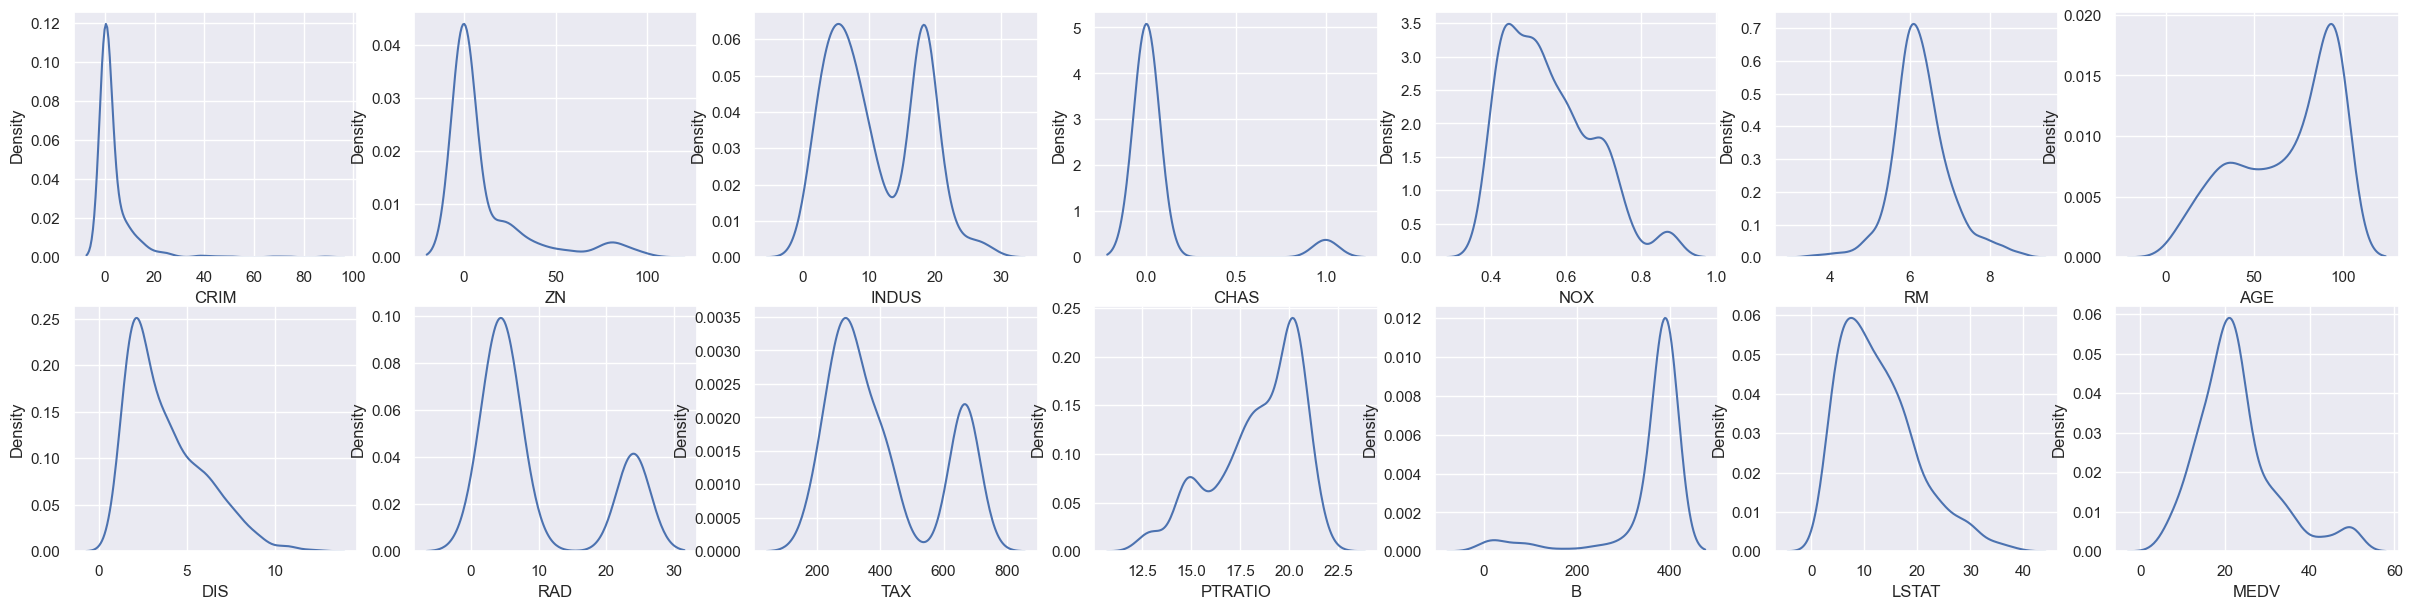

In [65]:
#Comprovem si te una distribució normal amb el test de Shapiro-Wilk
#Test de normalitat a cada columna

# Alfa=5%
# H0: La mostra té una distribució normal
# H1: La mostra no té una distribució normal

from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

sns.set_theme()

#llegim dades
fitxer="D:/Users/X/Downloads/housing data.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=',',header=None) #encoding='ISO-8859-1' tambe ok
#utilitzem el nom de les columnes del fitxer descripció per completar el dataframe
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

fig, axes = plt.subplots(2, df.columns.size//2, figsize=(30, 7))
i=0
j=0
for x in df.columns:
    #print('x',df[x])
    dades=df[x]
    sns.kdeplot(ax=axes[i,j],x=dades)
    j=j+1
    if (j>=df.columns.size//2):
        i=1
        j=0
    stat, p = shapiro(dades)
    print('Variable:', x)
    print('t-statistic=%.3f' % (stat))
    print('p-value=%.3f' % (p))
    if p > 0.05:
        print('p>Alfa --> Probablement la distribució és normal')
    else:
        print('p<=Alfa -->Probablement la distribució no és normal')
    

Serà convenient fer algun tipus de transformació per poder aplicar els procediments de Machine Learnig estudiats.

### Grups de training i de test    
Definim i estudiem dos grups diferenciats de dades per poder definir el model (train) i per poder evaluar-lo (test)

In [27]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

#llegim dades
fitxer="D:/Users/X/Downloads/housing data.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=',',header=None) #encoding='ISO-8859-1' tambe ok
#utilitzem el nom de les columnes del fitxer descripció per completar el dataframe
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#definim les dades d'entrada = input,predictors -->X
X = df.loc[:, ['ZN','INDUS','AGE','DIS','TAX','LSTAT']]

#definim les dades de sortida=output,responses --> y
y = df.loc[:, ['NOX']]
    
#creem els datasets d'entrada/sortida i de train/test
#ho fem seleccionant el 80% de les dades per train i el 20% per test
# random_state = 42, per tenir sempre la mateixa mostra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42) 
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)



X_train: (404, 6)
X_test: (102, 6)
y_train: (404, 1)
y_test: (102, 1)


In [10]:
#comparem X_Train amb X_Test, per veure si son conjunts de dades similars
print('X_train')
print(X_train.describe())
print('\nX_test')      
print(X_test.describe())

X_train
               ZN       INDUS         AGE         DIS         TAX       LSTAT
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000
mean    11.569307   10.985050   68.556436    3.808195  404.032178   12.457351
std     23.152481    6.894618   27.994922    2.131226  166.172655    7.110381
min      0.000000    0.740000    2.900000    1.129600  187.000000    1.730000
25%      0.000000    5.130000   45.550000    2.087875  279.000000    6.772500
50%      0.000000    8.560000   77.700000    3.175750  330.000000   10.925000
75%     20.000000   18.100000   93.650000    5.400800  666.000000   16.372500
max    100.000000   27.740000  100.000000   12.126500  711.000000   37.970000

X_test
               ZN       INDUS         AGE         DIS         TAX       LSTAT
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000
mean    10.549020   11.737745   68.648039    3.742949  424.892157   13.428235
std     24.083242    6.722576   28.890866    2.0

Els descriptors estadístics són força semblants  
Veiem-ho ara gràficament amb boxplots. En aquest cas, els boxplot de la variable ZN sí que presenta discrepancies visuals, probablement degut a que, encara que es tracta de una variable numèrica, té certes connotacions de variable categòrica i amb una distribució molt esbiaixada (a tenir en compte en anàlisis posteriors)

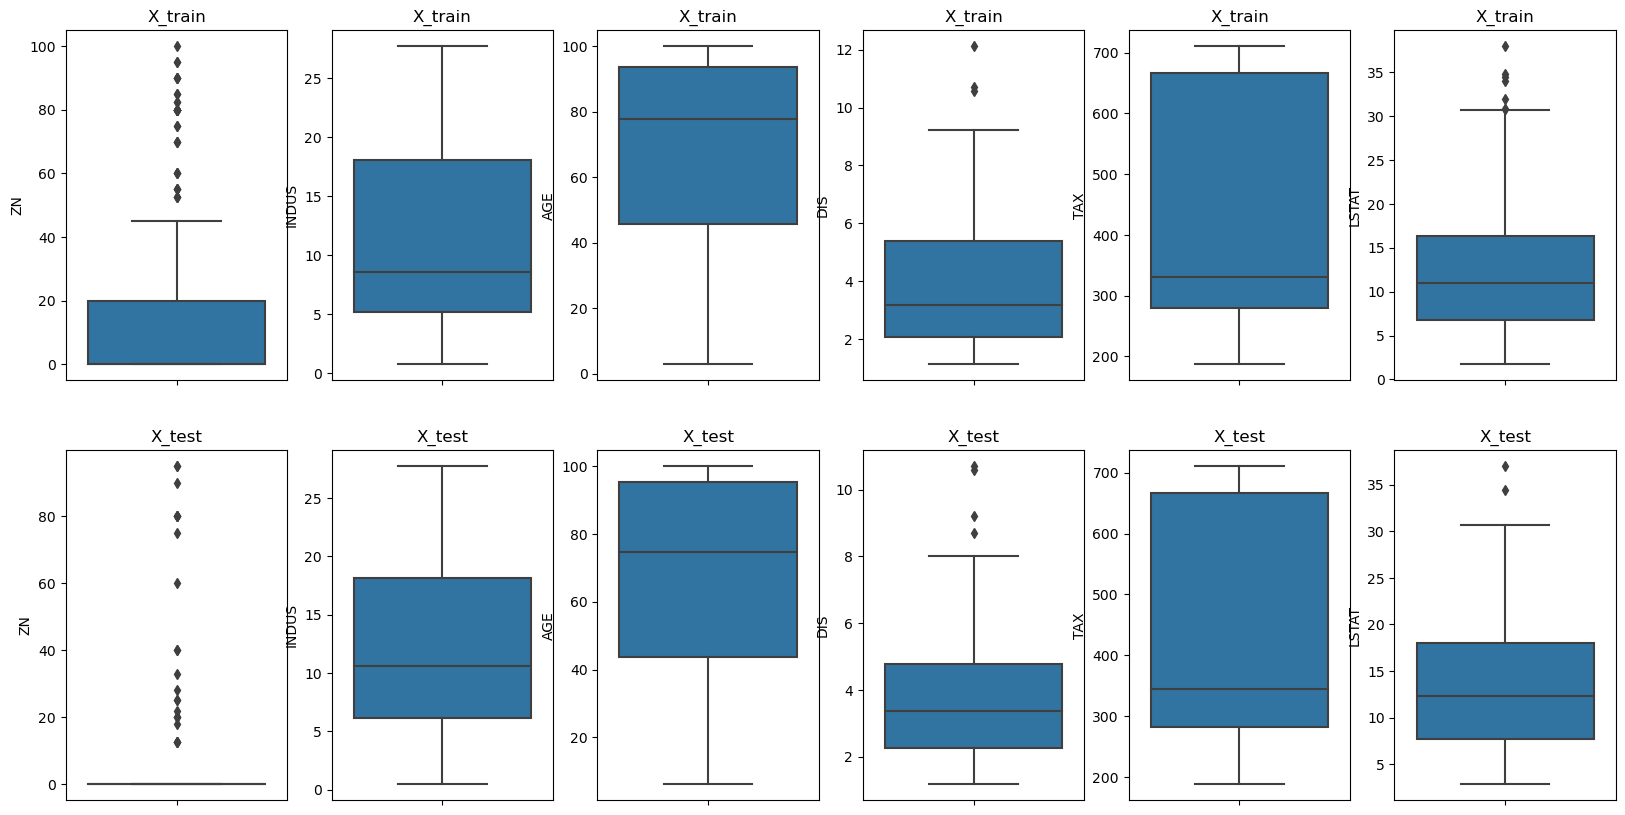

In [11]:
import seaborn as sns

fig, axes = plt.subplots(2, X_train.columns.size, figsize=(20, 10))
i=0
for v in X_train.columns:
    sns.boxplot(ax=axes[0,i],y=X_train[v]).set_title('X_train')
    sns.boxplot(ax=axes[1,i],y=X_test[v]).set_title('X_test')
    i=i+1


Farem el  mateix per la variable de sortida.  
Aquí també veiem que els datasets de train i de test tenen un comportament molt similar.

In [12]:
#comparem y_train amb y_test, per veure si son conjunts de dades similars
print('y_train')
print(y_train.describe())
print('\ny_test')
print(y_test.describe())

y_train
              NOX
count  404.000000
mean     0.556484
std      0.117704
min      0.385000
25%      0.452000
50%      0.538000
75%      0.631000
max      0.871000

y_test
              NOX
count  102.000000
mean     0.547609
std      0.108602
min      0.392000
25%      0.448250
50%      0.532000
75%      0.621500
max      0.871000


[Text(0.5, 1.0, 'y_test')]

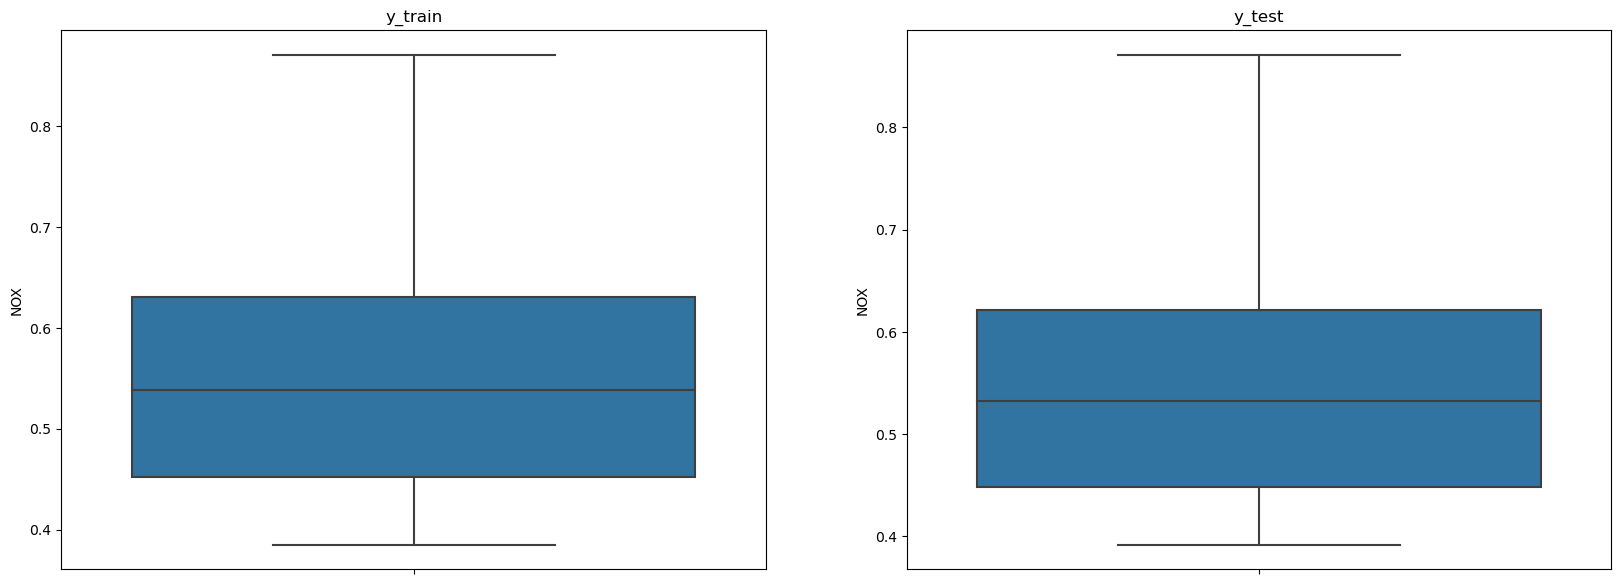

In [13]:
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(20, 7))

sns.boxplot(ax=axes[0],y=y_train['NOX']).set(title='y_train')
sns.boxplot(ax=axes[1],y=y_test['NOX']).set(title='y_test')


### Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).  
  
    
### Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica


Estandarditació de les variable 'INDUS' i 'DIS'  
  
Hem vist que les columnes no tenen (probablement) una distribució normal. Anem a aplicar una transformació d'estandardització sobre les columnes 'DIS' i 'INDUS'

mitja de DIS 3.795042687747036
mitja de INDUS 11.13677865612648
std de DIS 2.1057101266276104
std de INDUS 6.8603529408975845
Resultat del proces destandardització:
	Mitja = tscaler.mean_ [11.13677866  3.79504269]
	Desviació estàndard=tscaler.scale_ [6.85357058 2.10362836]
Dades estandarditzades = X_scaled
 [[-1.2879095   0.1402136 ]
 [-0.59338101  0.55715988]
 [-0.59338101  0.55715988]
 ...
 [ 0.11573841 -0.77368357]
 [ 0.11573841 -0.66843684]
 [ 0.11573841 -0.61324648]]

Dades amb les noves columnes
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  INDUS_EST   DIS_EST  

<Axes: ylabel='Density'>

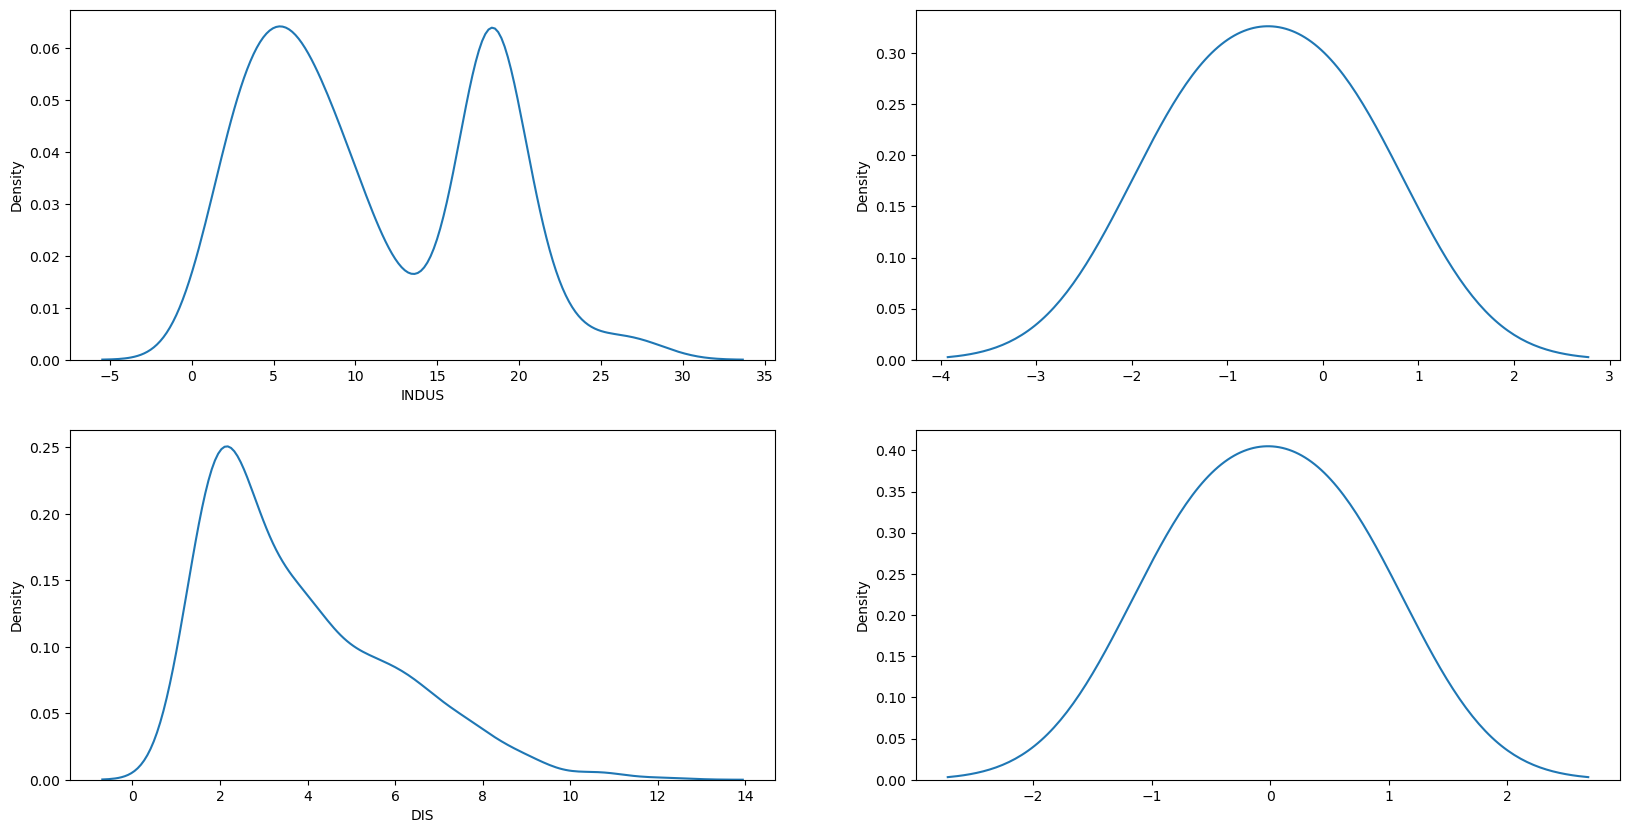

In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

#llegim dades
fitxer="D:/Users/X/Downloads/housing data.csv"
#definim la columna 'Rk' com index del dataframe
df=pd.read_csv(fitxer,encoding='Latin1',sep=',',header=None) #encoding='ISO-8859-1' tambe ok
#utilitzem el nom de les columnes del fitxer descripció per completar el dataframe
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

X=df[['INDUS','DIS']]
print('mitja de DIS',X['DIS'].mean())
print('mitja de INDUS',X['INDUS'].mean())
print('std de DIS',X['DIS'].std())
print('std de INDUS',X['INDUS'].std())
scaler = preprocessing.StandardScaler().fit(X)

print('Resultat del proces d''estandardització:')
print('\tMitja = tscaler.mean_',scaler.mean_)
print('\tDesviació estàndard=tscaler.scale_',scaler.scale_)

X_scaled = scaler.transform(X)
print('Dades estandarditzades = X_scaled\n',X_scaled)
#incorporem aquestes columes al dataframe original
resultat=pd.DataFrame(X_scaled,columns=['INDUS_EST','DIS_EST'])
df=pd.merge(df,resultat,left_index=True, right_index=True)
print('\nDades amb les noves columnes')
print(df.head())

#veiem els descriptors estadistics amb aquestes noves columnes
print('\nEstadistica descriptiva\n',df[['INDUS','DIS','INDUS_EST','DIS_EST']].describe())

#Visualitzem gràficament mitjancant un KDE les columnes originals i les transformades

fig, axes = plt.subplots(2,2,figsize=(20, 10))
sns.kdeplot(ax=axes[0,0],x=X['INDUS'])
sns.kdeplot(ax=axes[0,1],x=X_scaled[0])
sns.kdeplot(ax=axes[1,0],x=X['DIS'])
sns.kdeplot(ax=axes[1,1],x=X_scaled[1])




Creem unes coumnes dummy mitjançant un proces de One hot encoder, per les variable 'CHAS' (limitat pel riu) i 'RAD'(index d'accesibilitat per carreteres radials)  
La finalotta d'aquest provces seria converit dades categoiriques en daes que e spoguessin fer servir pels procedients d'scikit learn, que necessita sempre dades numèriques. En aquest cas, de moment, no li veig més interés que el posar en pràctica aquestes funcionalitats

In [15]:
from sklearn import preprocessing
X=df[['CHAS','RAD']]
print(X.value_counts())
enc = preprocessing.OneHotEncoder()
enc.fit(X)
print(enc.transform(X).toarray())
print('\ncategories creades')
print(enc.categories_)


CHAS  RAD
0     24     124
      5      104
      4      102
      3       36
      6       26
      2       24
      1       19
      8       19
      7       17
1     5       11
      4        8
      24       8
      8        5
      3        2
      1        1
dtype: int64
[[1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]

categories creades
[array([0, 1], dtype=int64), array([ 1,  2,  3,  4,  5,  6,  7,  8, 24], dtype=int64)]


Dades polinomiques.  
A vegades ens pot interesar afegir complexitat al model considerant caracteristiques no lineals a les dades d'entrada.  
Una de les possibilitats és afegir caracteristiques polinomials.


In [188]:

X=df[['RM','LSTAT']]
#afegimn característiques d'un polinomi de grau 2
poly = preprocessing.PolynomialFeatures(2)
resultat=poly.fit_transform(X)
print(resultat)
type(resultat)
r=pd.DataFrame(resultat,columns=['poly_1','poly_RM','poly_LSTAT','poly_RM2','poly_RM_LSTAT','poly_LSTAT2'])
#afegim les noves columnes al dataframe original
df=pd.merge(df,r,left_index=True, right_index=True)

[[ 1.        6.575     4.98     43.230625 32.7435   24.8004  ]
 [ 1.        6.421     9.14     41.229241 58.68794  83.5396  ]
 [ 1.        7.185     4.03     51.624225 28.95555  16.2409  ]
 ...
 [ 1.        6.976     5.64     48.664576 39.34464  31.8096  ]
 [ 1.        6.794     6.48     46.158436 44.02512  41.9904  ]
 [ 1.        6.03      7.88     36.3609   47.5164   62.0944  ]]


 Veiem la matriu de correlació amb aquestes noves dades.
 Els valors que indiquen les possibles correlacions més altes es troben entre les propies variables implicades en el càlcul d'aquets nous camps, lo qual no suposa un valor afegit massa considerable

In [189]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT,MEDV,INDUS_EST,DIS_EST,poly_1,poly_RM,poly_LSTAT,poly_RM2,poly_RM_LSTAT,poly_LSTAT2
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,...,0.455621,-0.388305,0.406583,-0.379670,NaN,-0.219247,0.455621,-0.203683,0.450529,0.460510
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,...,-0.412995,0.360445,-0.533828,0.664408,NaN,0.311991,-0.412995,0.307863,-0.419774,-0.323323
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,...,0.603800,-0.483725,1.000000,-0.708027,NaN,-0.391676,0.603800,-0.382654,0.606946,0.532496
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,...,-0.053929,0.175260,0.062938,-0.099176,NaN,0.091251,-0.053929,0.098034,-0.052988,-0.047605
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,...,0.590879,-0.427321,0.763651,-0.769230,NaN,-0.302188,0.590879,-0.283930,0.603520,0.530723
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,...,-0.613808,0.695360,-0.391676,0.205246,NaN,1.000000,-0.613808,0.994528,-0.492349,-0.545322
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,...,0.602339,-0.376955,0.644779,-0.747881,NaN,-0.240265,0.602339,-0.222991,0.627428,0.523764
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,...,-0.496996,0.249929,-0.708027,1.000000,NaN,0.205246,-0.496996,0.183715,-0.509215,-0.448110
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,...,0.488676,-0.381626,0.595129,-0.494588,NaN,-0.209847,0.488676,-0.196734,0.514001,0.451766
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,...,0.543993,-0.468536,0.720760,-0.534432,NaN,-0.292048,0.543993,-0.280877,0.560237,0.494704
